# Section 2:

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn import metrics

%matplotlib inline

df = pd.read_csv("Data/diabetes.csv")
df.columns = df.columns.str.replace(" \\n","", regex=True)
df.columns = df.columns.str.strip()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


### (a) Perform an exploratory analysis of the data. Comment on findings that interest you.

### Main Conclusions:
* People with higher glucose are more likely to have Outcome = ‘1’.
* None of the variables seem to be very correlated with each other.
* Glucose has the highest correlation with Outcome (0.458421), but it is not strong enough to make confident assumptions.

* A multiple regression model using Outcome as the response and all other variables as predictors gives the following results:
* From these results, SkinThickness shows a high p value, meaning the null hypothesis can not be rejected.

In [37]:
model1 = ols('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 20 May 2024   Prob (F-statistic):          1.41e-140
Time:                        12:34:40   Log-Likelihood:                -1007.6
No. Observations:                2000   AIC:                             2033.
Df Residuals:                    1991   BIC:                             2084.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Work:

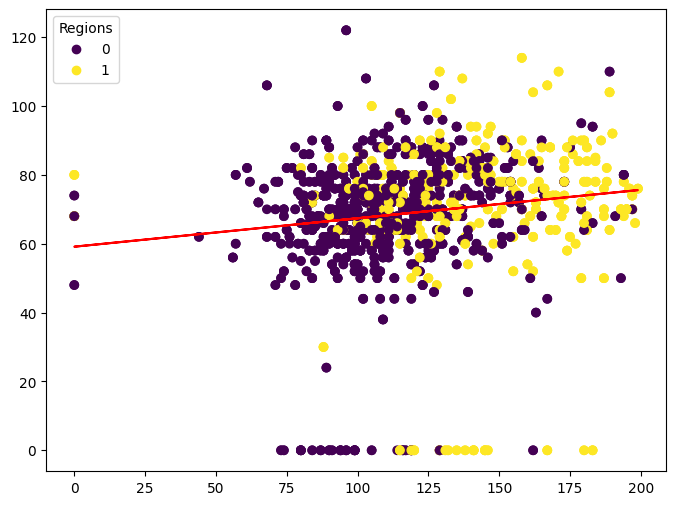

In [3]:
X = df.Glucose.to_numpy().reshape([-1,1])
y = df.BloodPressure.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('BloodPressure ~ Glucose',data=df).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = df.Outcome, label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Regions", loc = "best")
plt.show()

In [4]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     38.81
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           5.67e-10
Time:                        14:04:56   Log-Likelihood:                -8726.7
No. Observations:                2000   AIC:                         1.746e+04
Df Residuals:                    1998   BIC:                         1.747e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.1360      1.662     35.583      0.0

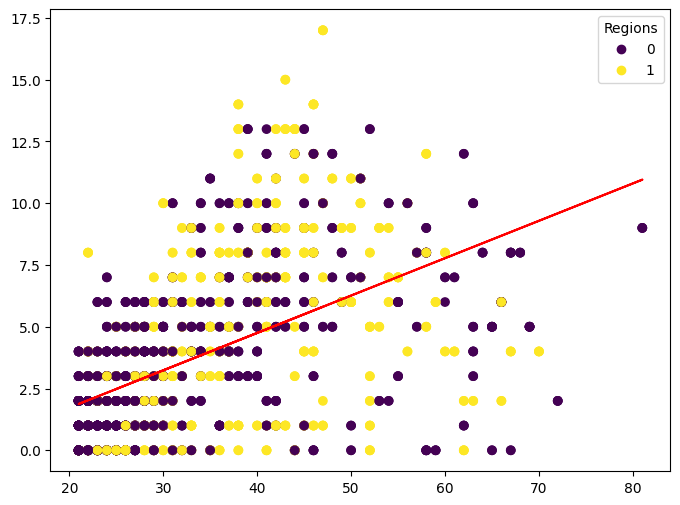

In [5]:
X = df.Age.to_numpy().reshape([-1,1])
y = df.Pregnancies.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('Pregnancies ~ Age',data=df).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = df.Outcome, label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Regions", loc = "best")
plt.show()

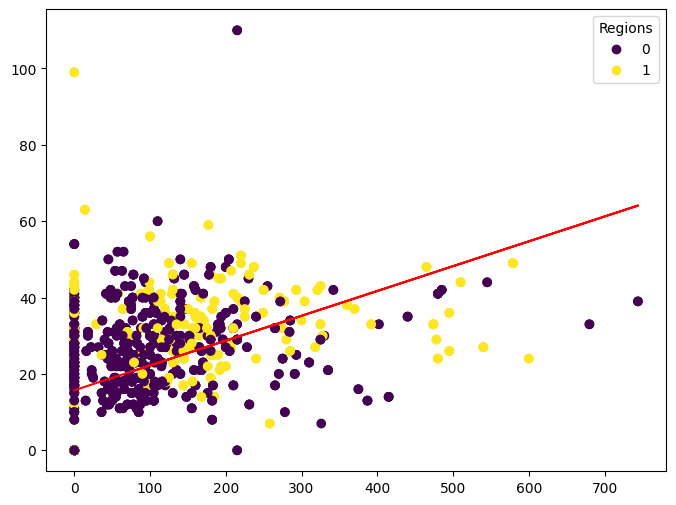

In [6]:
X = df.Insulin.to_numpy().reshape([-1,1])
y = df.SkinThickness.to_numpy()
fit1 = LinearRegression().fit(X, y)

model1 = ols('SkinThickness ~ Insulin',data=df).fit()
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X, y, c = df.Outcome, label="DATA")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(handles=scatter.legend_elements()[0], labels=['0', '1'], title="Regions", loc = "best")
plt.show()

In [7]:
model1 = ols('Outcome ~ Pregnancies',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.97e-24
Time:                        14:04:57   Log-Likelihood:                -1294.7
No. Observations:                2000   AIC:                             2593.
Df Residuals:                    1998   BIC:                             2605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2227      0.016     14.338      

In [8]:
model1 = ols('Outcome ~ Glucose',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     531.6
Date:                Sat, 23 Sep 2023   Prob (F-statistic):          1.72e-104
Time:                        14:04:58   Log-Likelihood:                -1110.5
No. Observations:                2000   AIC:                             2225.
Df Residuals:                    1998   BIC:                             2236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4800      0.037    -13.015      0.0

In [9]:
model1 = ols('Outcome ~ BloodPressure',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.59
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           0.000675
Time:                        14:04:59   Log-Likelihood:                -1340.6
No. Observations:                2000   AIC:                             2685.
Df Residuals:                    1998   BIC:                             2696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2121      0.040      5.359

In [10]:
model1 = ols('Outcome ~ SkinThickness',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.62
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           0.000665
Time:                        14:05:00   Log-Likelihood:                -1340.6
No. Observations:                2000   AIC:                             2685.
Df Residuals:                    1998   BIC:                             2696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2951      0.017     16.999

In [11]:
model1 = ols('Outcome ~ Insulin',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     29.65
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           5.81e-08
Time:                        14:05:01   Log-Likelihood:                -1331.7
No. Observations:                2000   AIC:                             2667.
Df Residuals:                    1998   BIC:                             2679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3006      0.013     23.133      0.0

In [12]:
model1 = ols('Outcome ~ BMI',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     165.7
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           1.75e-36
Time:                        14:05:02   Log-Likelihood:                -1266.7
No. Observations:                2000   AIC:                             2537.
Df Residuals:                    1998   BIC:                             2549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1767      0.042     -4.250      0.0

In [13]:
model1 = ols('Outcome ~ DiabetesPedigreeFunction',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     49.48
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           2.74e-12
Time:                        14:05:03   Log-Likelihood:                -1321.9
No. Observations:                2000   AIC:                             2648.
Df Residuals:                    1998   BIC:                             2659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [14]:
model1 = ols('Outcome ~ Age',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           7.95e-27
Time:                        14:05:03   Log-Likelihood:                -1288.8
No. Observations:                2000   AIC:                             2582.
Df Residuals:                    1998   BIC:                             2593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0269      0.031      0.876      0.3

### (b) Perform an LDA of the data. Compute the confusion matrix, sensitivity, specificity, and overall misclassification rate based on 0.5 cutoff for the posterior probability. Plot the ROC curve. What do you observe?

In [27]:
trainX = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
trainY = df['Outcome']

testX = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
testY = df['Outcome']

lda = LinearDiscriminantAnalysis()
model = lda.fit(trainX, trainY)

pred = model.predict(testX) # cut-off = .5 by default

In [34]:
CM = metrics.confusion_matrix(pred, testY)
sensitivity = CM[0][0] / float(CM[0][0]+CM[0][1])
specificity = CM[1][1] / float(CM[1][1]+CM[1][0])


print("Confusion Matrix:")
print(CM)
print("Sensitivity:", round(sensitivity, 2))
print("Specificity", round(specificity, 2))
print("Overall misclassification rate:", round(1 - metrics.accuracy_score(pred, testY), 2))

print(metrics.classification_report(testY, pred, digits=3))

Confusion Matrix:
[[1174  298]
 [ 142  386]]
Sensitivity: 0.8
Specificity 0.73
Overall misclassification rate: 0.22
              precision    recall  f1-score   support

           0      0.798     0.892     0.842      1316
           1      0.731     0.564     0.637       684

    accuracy                          0.780      2000
   macro avg      0.764     0.728     0.740      2000
weighted avg      0.775     0.780     0.772      2000



Text(0.5, 1.0, 'ROC Curve')

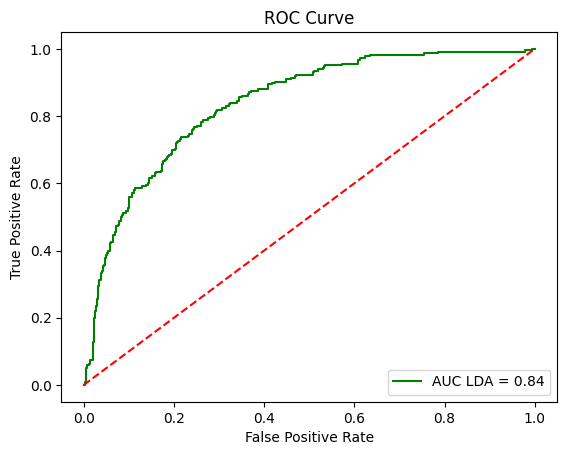

In [14]:
predictions_prob = model.predict_proba(testX)
false_positive_rate, recall, thresholds = metrics.roc_curve(testY, predictions_prob[:,1])
roc_auc = metrics.auc(false_positive_rate, recall)
plt.plot(false_positive_rate, recall, 'g', label = 'AUC %s = %0.2f' % ('LDA', roc_auc))
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

### (c) Repeat (b) using QDA.

In [9]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(trainX, trainY)

In [35]:
pred2=model2.predict(testX)
CM = metrics.confusion_matrix(pred2, testY)
sensitivity = CM[0][0] / float(CM[0][0]+CM[0][1])
specificity = CM[1][1] / float(CM[1][1]+CM[1][0])

print("Confusion Matrix:")
print(CM)
print("Sensitivity:", round(sensitivity, 2))
print("Specificity", round(specificity, 2))
print("Overall misclassification rate:", round(1 - metrics.accuracy_score(pred2, testY), 2))

print(metrics.classification_report(testY, pred2, digits=3))

Confusion Matrix:
[[1135  290]
 [ 181  394]]
Sensitivity: 0.8
Specificity 0.69
Overall misclassification rate: 0.24
              precision    recall  f1-score   support

           0      0.796     0.862     0.828      1316
           1      0.685     0.576     0.626       684

    accuracy                          0.764      2000
   macro avg      0.741     0.719     0.727      2000
weighted avg      0.758     0.764     0.759      2000



Text(0.5, 1.0, 'ROC Curve')

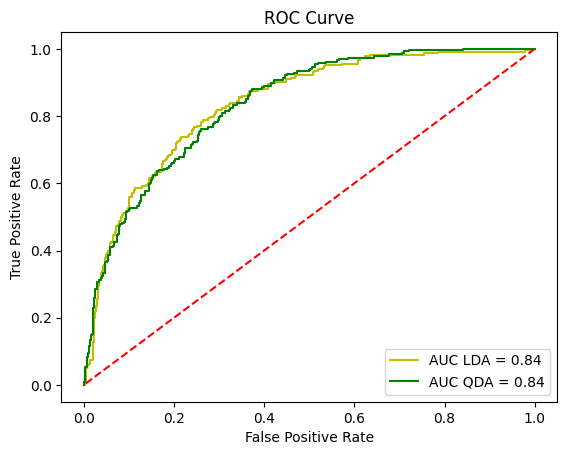

In [136]:
predictions_prob2 = model2.predict_proba(testX)
false_positive_rate2, recall2, thresholds = metrics.roc_curve(testY, predictions_prob2[:,1])
roc_auc2 = metrics.auc(false_positive_rate2, recall2)
len(recall)
plt.plot(false_positive_rate, recall, 'y', label = 'AUC %s = %0.2f' % ('LDA', roc_auc))
plt.plot(false_positive_rate2, recall2, 'g', label = 'AUC %s = %0.2f' % ('QDA', roc_auc2))
plt.plot([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')

### (d) Compare the results from (b) and (c). Which classifier would you recommend? For the recommended classifier what posterior probability cutoff would you suggest? Justify your answer.

* I would use LDA because the ROC curve shows a higher true positive rate overall for the model.
* I think that I would use a cutoff of .24 because it is one of the closest points on the LDA plot to the top right corner of the graph.
* It has a high true positive rate and low false positive rate.


Text(0.5, 1.0, 'ROC Curve')

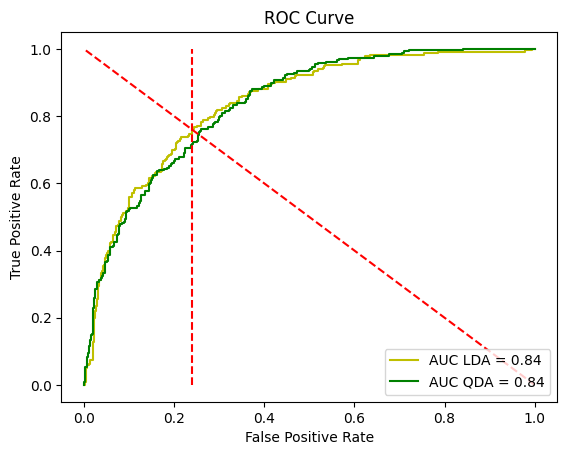

In [26]:
predictions_prob2 = model2.predict_proba(testX)
false_positive_rate2, recall2, thresholds = metrics.roc_curve(testY, predictions_prob2[:,1])
roc_auc2 = metrics.auc(false_positive_rate2, recall2)
len(recall)
plt.plot(false_positive_rate, recall, 'y', label = 'AUC %s = %0.2f' % ('LDA', roc_auc))
plt.plot(false_positive_rate2, recall2, 'g', label = 'AUC %s = %0.2f' % ('QDA', roc_auc2))
plt.plot([1,0], [0,1], 'r--')
plt.plot([.24,.24], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')